# Questão 1

In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

In [3]:
quake_data = genfromtxt('quake.csv', delimiter=',')
quake_data.shape

(2178, 2)

In [97]:
def distancia_euclidiana_quadrada(X, centroid, cov_inv):
    return np.sum((X-centroid)**2, axis = 1)

def distancia_mahalonobis_quadrada(X, centroid, cov_inv=None):
    if cov_inv is None:
        cov = np.cov(X, rowvar=False)
        cov_inv = np.linalg.inv(cov)

    diff = X - centroid
    return np.sum((diff @ cov_inv) * diff, axis=1)
    

#### Davies-Bouldin index

In [98]:
def davies_bouldin_index(X, labels, centroids, distance_func = distancia_euclidiana_quadrada, cov_inv = None):
    k = len(centroids)
    S = np.zeros(k)

    # espalhamento intra-agrupamento
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = distance_func(cluster_points, centroids[i], cov_inv)
            S[i] = np.mean(np.sqrt(distances))  # usa raiz da distancia quadrada

    # espalhamento entre grupos
    M = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i != j:
                dist_ij = distance_func(centroids[i].reshape(1, -1), centroids[j], cov_inv)
                M[i, j] = np.sqrt(dist_ij[0])


    R = np.zeros((k, k))
    for i in range(k):
        for j in range(k):
            if i != j and M[i, j] != 0:
                R[i, j] = (S[i] + S[j]) / M[i, j]
    # R maximo para cada cluster
    D = np.max(R, axis=1)
    return np.mean(D)


#### K-means

In [37]:
def quant_error(data, centroide):
    return np.sum((data - centroide)**2, axis = 1)

def kmeans(X, k, epsilon = 1e-4, max_iters = 50, distancias = distancia_euclidiana_quadrada):
    indices = np.random.choice(X.shape[0], size=k, replace=False)
    centroides = X[indices]

    erros = []
    erro_total = float('inf')
    iters = 0

    while(erro_total>epsilon and iters < max_iters):
        
        erro_total = 0

        distancias_centroide = np.array([distancias(X,c) for c in centroides])
        labels_centroide = np.argmin(distancias_centroide, axis = 0)

        novos_centroides = np.array([
            X[labels_centroide == i].mean(axis=0) if np.any(labels_centroide == i) else centroides[i]
            for i in range(k)
        ])
            
        for i in range(k):
            erro_total += np.sum(quant_error(X[labels_centroide == i], centroides[i]))
        erros.append(erro_total)
        centroides = novos_centroides
        iters+=1

    return labels_centroide, centroides, erros

## item a)

#### Descobrindo qual o melhor número de clusters, utilizando o índice de Davies-Bouldin

In [99]:
best_dbi = float('inf')

for i in range(4,21):
    labels, centroides, erros = kmeans(quake_data, i)
    dbi = davies_bouldin_index(quake_data, labels, centroides)
    if dbi<best_dbi:
        best_dbi = dbi
        best_k = i

print(f'Melhor número de clusters: {best_k} \nMelhor dbi: {best_dbi}')

Melhor número de clusters: 6 
Melhor dbi: 0.5501912078396733


In [100]:
labels, centroides, erros = kmeans(quake_data, best_k) 

labels, centroides

(array([0, 4, 4, ..., 4, 4, 5], dtype=int64),
 array([[  35.0929562 ,   53.95437956],
        [  -3.99842657,  149.00374126],
        [  -4.60290172, -116.08798752],
        [ -21.56985849,  167.43103774],
        [  41.63706044,  146.83631868],
        [   3.08401496,  118.88912718]]))

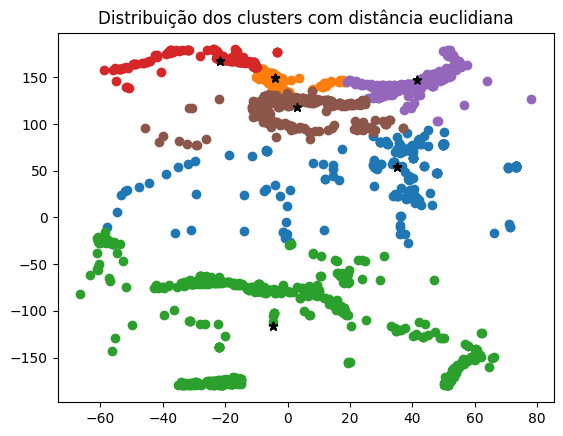

In [101]:
plt.title('Distribuição dos clusters com distância euclidiana')
for i in range(len(centroides)):
    plt.scatter(quake_data[labels == i, 0], quake_data[labels == i, 1])
    plt.scatter(centroides[:,0], centroides[:,1], color= 'black', marker='*')
plt.show()

## item b) 

#### Descobrindo qual o melhor número de clusters, utilizando o índice de Davies-Bouldin

In [121]:
best_dbi = float('inf')

# precalcular a matriz de covâriancia
cov = np.cov(quake_data, rowvar=False)
cov_inv = np.linalg.inv(cov)

for i in range(4,21):
    labels, centroides, erros = kmeans(quake_data, i, distancias= distancia_mahalonobis_quadrada)
    dbi = davies_bouldin_index(quake_data, labels, centroides, distance_func=distancia_mahalonobis_quadrada, cov_inv=cov_inv)
    if dbi<best_dbi:
        best_dbi = dbi
        best_k = i

print(f'Melhor número de clusters: {best_k} \nMelhor dbi: {best_dbi}')

Melhor número de clusters: 7 
Melhor dbi: 0.5867037139124485


In [122]:
labels, centroides, erros = kmeans(quake_data, best_k) 

labels, centroides

(array([2, 0, 0, ..., 0, 0, 5], dtype=int64),
 array([[  41.2895393 ,  146.87563686],
        [ -13.6824186 ,  159.55093023],
        [  37.47416031,   58.81263359],
        [ -15.72095101,  -67.04599424],
        [  51.95860465, -154.06077519],
        [   2.5965    ,  121.8533913 ],
        [ -23.59823204, -174.15563536]]))

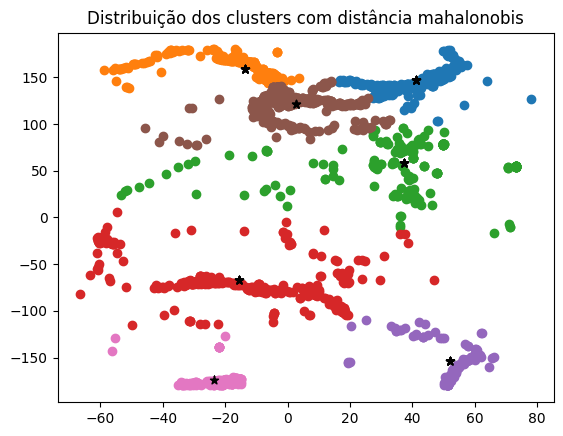

In [123]:
plt.title('Distribuição dos clusters com distância mahalonobis')
for i in range(len(centroides)):
    plt.scatter(quake_data[labels == i, 0], quake_data[labels == i, 1])
    plt.scatter(centroides[:,0], centroides[:,1], color= 'black', marker='*')
plt.show()

# Questão 2

In [4]:
penguins_data = genfromtxt('penguins.csv', delimiter=',')
penguins_data.shape

(333, 5)

## item a) 

#### PCA

In [ ]:
def PCA(dados, dimensoes):
        
    n = dados.shape[0]
    dados_normalizado= (dados - np.mean(dados, axis = 0))/np.std(dados, axis = 0)

    #SVD
    U, S, VT = np.linalg.svd(dados_normalizado, full_matrices=False)

    autovetores_variancia = (S**2)/(n-1)

    dados_projetados = dados_normalizado @ VT.T[:, :dimensoes]

    return autovetores_variancia, dados_projetados

In [63]:
autovetores_variancia, penguins_projetados = PCA(penguins_data, 2)

In [71]:
penguins_projetados

array([[-2.12727336e+00, -4.49959693e-04],
       [-1.65117116e+00,  4.38572518e-01],
       [-1.70276795e+00,  1.69968514e-01],
       [-2.16213932e+00,  3.38531820e-02],
       [-2.20669272e+00, -7.89544578e-01],
       [-2.04578466e+00,  3.97163180e-01],
       [-1.26402675e+00, -5.76668222e-01],
       [-2.05712902e+00,  2.98061504e-01],
       [-2.24805454e+00, -9.76865507e-01],
       [-1.92918557e+00, -6.20011549e-01],
       [-2.02875467e+00,  6.25172101e-01],
       [-1.89056912e+00, -7.89303074e-02],
       [-1.25914753e+00, -1.35615100e+00],
       [-2.55037048e+00,  7.01187534e-01],
       [-1.43176780e+00, -1.99905434e+00],
       [-2.59448013e+00,  3.88438908e-01],
       [-2.35011521e+00,  1.84788320e-01],
       [-2.14202472e+00,  1.19437773e-01],
       [-1.82522083e+00,  2.86686390e-01],
       [-1.87624985e+00,  6.19080876e-01],
       [-2.20020571e+00,  3.12346816e-01],
       [-2.04386596e+00, -1.02628639e-01],
       [-1.98029970e+00,  2.27076129e-01],
       [-2.

## item b) 

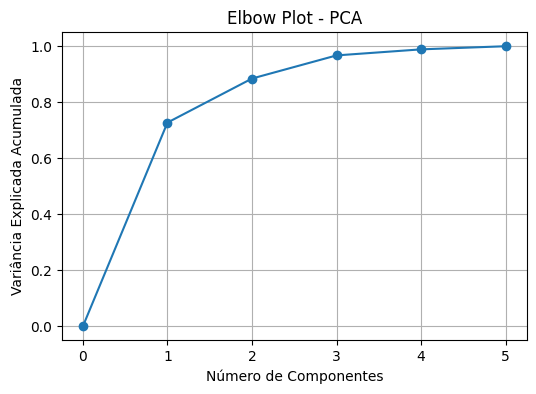

In [69]:
proporcao =  autovetores_variancia/np.sum(autovetores_variancia)

proporcao = np.insert(proporcao, 0, 0)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(proporcao), marker='o')
plt.xlabel("Número de Componentes")
plt.ylabel("Variância Explicada Acumulada")
plt.title("Elbow Plot - PCA")
plt.grid(True)
plt.show()

O gráfico acima mostra que utilizando as colunas 1 e 2 do dataset já obtemos uma variância explicada de quase 90%, e que, quanto mais adicionamos colunas no nosso PCA, maior essa variância e mais próximo do dataset original chegamos. 

In [67]:
autovetores_variancia

array([3.64734124, 0.78889341, 0.41438473, 0.10826109, 0.05617977])